In [51]:
# Load relevant R packages
inLibraries = list('repr','rgdal','spdep','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

In [52]:
worldPoly <- readOGR("datasets/world", "WorldAdmin")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/world", layer: "WorldAdmin"
with 3161 features
It has 14 fields
Integer64 fields read as strings:  OBJECTID Land_Rank 


In [53]:
data <- worldPoly@data 

In [54]:
peek <- head(data, 3)

In [55]:
t(peek)

,0,1,2
OBJECTID,1,2,3
NAME,A'ana,Acre,Aiga-i-le-Tai
COUNTRY,Samoa,Brazil,Samoa
ISO_CODE,WSAA,BRAC,WSAL
ISO_CC,WS,BR,WS
ISO_SUB,AA,AC,AL
ADMINTYPE,District,State,District
COUNTRYAFF,Samoa,Brazil,Samoa
CONTINENT,Oceania,South America,Oceania
Land_Type,Medium island,Primary land,Medium island


In [56]:
summary(worldPoly)

Object of class SpatialPolygonsDataFrame
Coordinates:
         min       max
x -180.00000 180.00000
y  -55.71535  83.66092
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
    OBJECTID          NAME     
 1      :   1   Central :  10  
 1001   :   1   Western :   9  
 1005   :   1   Northern:   7  
 1008   :   1   Eastern :   6  
 1011   :   1   Southern:   5  
 1013   :   1   (Other) :3121  
 (Other):3155   NA's    :   3  
                                      COUNTRY        ISO_CODE        ISO_CC    
 Slovenia                                 : 210   CABC   :   3   SI     : 210  
 Russian Federation                       :  99   CANT   :   3   RU     :  99  
 The Former Yugoslav Republic of Macedonia:  84   CANU   :   3   MK     :  84  
 Turkey                                   :  83   CAQC   :   3   TR     :  83  
 Philippines                              :  79   CLMA   :   3   PH     :  79  
 (Other)               

In [57]:
str(data)

'data.frame':	3161 obs. of  14 variables:
 $ OBJECTID  : Factor w/ 3161 levels "1","1001","1005",..: 1 574 1289 2701 2941 3106 119 178 237 390 ...
 $ NAME      : Factor w/ 2946 levels "18 Montagnes",..: 2 27 52 55 55 126 141 142 145 162 ...
 $ COUNTRY   : Factor w/ 188 levels "Afghanistan",..: 142 22 142 34 34 22 132 132 132 133 ...
 $ ISO_CODE  : Factor w/ 3002 levels "AD","AE","AEAZ",..: 2945 256 2946 410 410 257 1976 1970 1973 1795 ...
 $ ISO_CC    : Factor w/ 188 levels "AD","AE","AF",..: 184 21 184 33 33 21 140 140 140 132 ...
 $ ISO_SUB   : Factor w/ 1114 levels "0","00","001",..: 316 319 335 329 329 335 177 112 145 345 ...
 $ ADMINTYPE : Factor w/ 71 levels "Administration",..: 29 63 29 53 53 63 28 28 28 53 ...
 $ COUNTRYAFF: Factor w/ 181 levels "Afghanistan",..: 136 22 136 34 34 22 127 127 127 128 ...
 $ CONTINENT : Factor w/ 8 levels "Africa","Antarctica",..: 7 8 7 8 8 8 8 8 8 8 ...
 $ Land_Type : Factor w/ 3 levels "Large island",..: 2 3 2 2 3 3 3 3 3 3 ...
 $ Land_Rank : Fa

Select administrative areas that are associated with the continent of Africa and the country of Madagascar that have a land type of 'Primary land'. Display the polygons and label them with their administrative name.

In [58]:
subset(data, (CONTINENT == "Africa" & COUNTRY == "Madagascar" & Land_Type == "Primary land"))

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
150,285,Antananarivo,Madagascar,MGT,MG,T,Province,Madagascar,Africa,Primary land,5,11.61495,4.985905,0
151,288,Antsiranana,Madagascar,MGD,MG,D,Province,Madagascar,Africa,Primary land,5,24.33704,3.609013,0
192,379,Fianarantsoa,Madagascar,MGF,MG,F,Province,Madagascar,Africa,Primary land,5,25.68878,8.803421,0
241,484,Mahajanga,Madagascar,MGM,MG,M,Province,Madagascar,Africa,Primary land,5,49.65140,12.924846,0
344,687,Toamasina,Madagascar,MGA,MG,A,Province,Madagascar,Africa,Primary land,5,25.26490,6.058755,0
345,690,Toliara,Madagascar,MGU,MG,U,Province,Madagascar,Africa,Primary land,5,59.09371,14.343220,0


In [59]:
subset1 <- worldPoly[worldPoly$CONTINENT == "Africa" & 
                             worldPoly$COUNTRY == "Madagascar" & 
                             worldPoly$Land_Type == "Primary land", ]

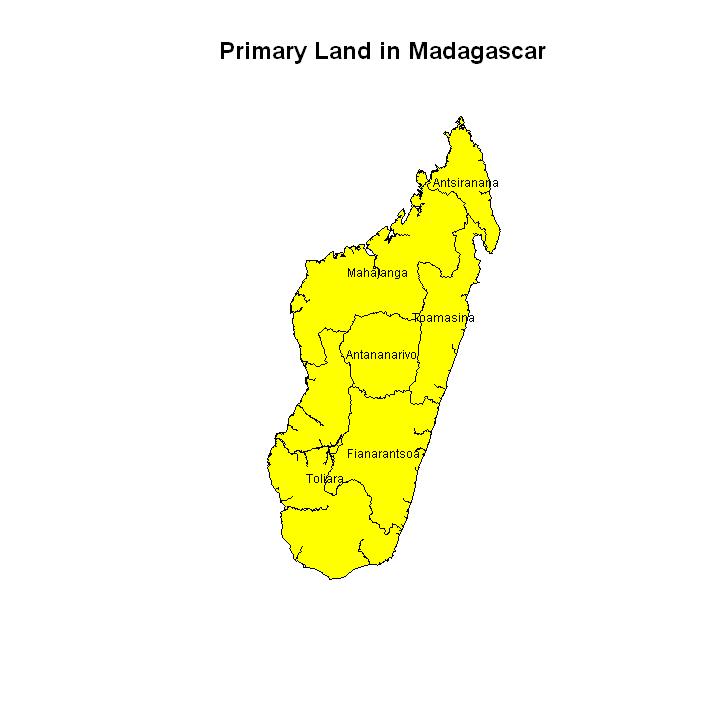

In [60]:
plot(subset1, col = "yellow", main = "Primary Land in Madagascar")

# get the centroid of the polygons
centroids <- gCentroid(subset1, byid = TRUE)
centroidLong <- coordinates(centroids)[, 1]
centroidLat <- coordinates(centroids)[, 2]

# add text label
text(centroidLong, centroidLat, labels = subset1$NAME, cex = 0.6)

Based upon the Queen's criterion, identify the neighbors for each administrative polygon in Madagascar. Plot the neighborhood relations on the map as lines.

In [61]:
# JACKY: I want to grab the neighbors for each polygon (Queen's criterion)
subset1.nb <- poly2nb(subset1, queen = TRUE) 

In [62]:
subset1.nb

Neighbour list object:
Number of regions: 6 
Number of nonzero links: 20 
Percentage nonzero weights: 55.55556 
Average number of links: 3.333333 

In [63]:
head(subset1.nb, 10)

[[1]]
[1] 3 4 5 6

[[2]]
[1] 4 5

[[3]]
[1] 1 5 6

[[4]]
[1] 1 2 5 6

[[5]]
[1] 1 2 3 4

[[6]]
[1] 1 3 4

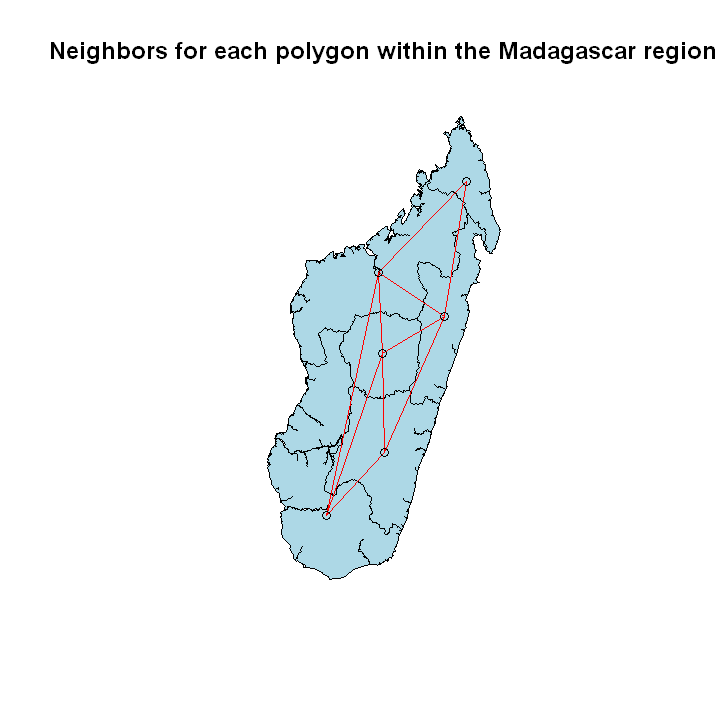

In [64]:
plot(subset1, col = "lightblue", main = "Neighbors for each polygon within the Madagascar region")
plot(subset1.nb, coordinates(subset1), add = TRUE, col = "red")

1. List the neighborhood sets for each admin unit.
2. Display the standard binary contiguity matrix.
3. Display a binary contiguity matrix weighted by distance to neighbors.

In [65]:
worldPoly.nb <- poly2nb(worldPoly, queen = TRUE)

In [66]:
head(worldPoly.nb, 10)

[[1]]
[1]   3  59 143

[[2]]
[1]   80   98  117  146 3077 3083

[[3]]
[1] 1

[[4]]
[1] 0

[[5]]
[1]  35  79  83 126

[[6]]
[1]  20 104 132

[[7]]
[1]  22  39  86 107 127

[[8]]
[1]  24  25  28  66  90 101

[[9]]
[1]  28  39  86 124

[[10]]
[1] 64 69 76

In [67]:
peek

## Quick sanity check. 
# Admin # 1 is neighbors with # 3
# Both are in Samoa so that looks okay to me.

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
0,1,A'ana,Samoa,WSAA,WS,AA,District,Samoa,Oceania,Medium island,3,0.6443423,0.014811936,0
1,2,Acre,Brazil,BRAC,BR,AC,State,Brazil,South America,Primary land,5,24.1846105,12.727371761,0
2,3,Aiga-i-le-Tai,Samoa,WSAL,WS,AL,District,Samoa,Oceania,Medium island,3,0.1627449,0.001620462,0


In [68]:
## JACKY : Displays the standard binary contiguity matrix.

worldPoly.mat <- nb2mat(worldPoly.nb, style = "B", zero.policy = TRUE)

In [69]:
head(worldPoly.mat)

0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
worldPoly.centroids <- gCentroid(worldPoly, byid = TRUE)

In [71]:
head(worldPoly.centroids)

SpatialPoints:
           x          y
0 -171.96838 -13.887991
1  -70.43399  -9.300365
2 -172.04913 -13.869275
3  -74.29944 -46.660035
4  -73.02298 -46.401901
5  -36.62683  -9.511191
Coordinate Reference System (CRS) arguments: +proj=longlat +datum=WGS84
+no_defs +ellps=WGS84 +towgs84=0,0,0 

In [72]:
## JACKY: Display a binary contiguity matrix weighted by distance to neighbors.

worldPoly.dist <- nbdists(worldPoly.nb, coordinates(worldPoly.centroids))

In [73]:
head(worldPoly.dist)

[[1]]
[1] 0.08288917 0.48233746 0.15424048

[[2]]
[1] 2.688916 3.590693 7.763698 2.986800 7.681269 6.535237

[[3]]
[1] 0.08288917

[[4]]
NULL

[[5]]
[1] 5.200079 5.123060 6.066797 3.912039

[[6]]
[1] 5.876743 1.824097 1.346314

In [74]:
# Convert it back to a neighborhood list

worldPoly.nb2 <- nb2listw(worldPoly.nb, style = "B", glist = worldPoly.dist, zero.policy = TRUE)

Warning message in nb2listw(worldPoly.nb, style = "B", glist = worldPoly.dist, zero.policy = TRUE):
"zero sum general weights"

In [75]:
names(worldPoly.nb2)

[1] "style"      "neighbours" "weights"

In [76]:
worldPoly.nb2$weights[0:5]

[[1]]
[1] 0.08288917 0.48233746 0.15424048

[[2]]
[1] 2.688916 3.590693 7.763698 2.986800 7.681269 6.535237

[[3]]
[1] 0.08288917

[[4]]
NULL

[[5]]
[1] 5.200079 5.123060 6.066797 3.912039

In [77]:
worldPoly.nb2$neighbours[0:5]

[[1]]
[1]   3  59 143

[[2]]
[1]   80   98  117  146 3077 3083

[[3]]
[1] 1

[[4]]
[1] 0

[[5]]
[1]  35  79  83 126

Compute the 1st and 2nd order neighborhoods for the areas.  Display the admin polygons for Madagascar as well as lines representing the 2 different neighborhood levels (plot both on same map, using different colors for each line type).

In [78]:
subset1@data

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
150,285,Antananarivo,Madagascar,MGT,MG,T,Province,Madagascar,Africa,Primary land,5,11.61495,4.985905,0
151,288,Antsiranana,Madagascar,MGD,MG,D,Province,Madagascar,Africa,Primary land,5,24.33704,3.609013,0
192,379,Fianarantsoa,Madagascar,MGF,MG,F,Province,Madagascar,Africa,Primary land,5,25.68878,8.803421,0
241,484,Mahajanga,Madagascar,MGM,MG,M,Province,Madagascar,Africa,Primary land,5,49.65140,12.924846,0
344,687,Toamasina,Madagascar,MGA,MG,A,Province,Madagascar,Africa,Primary land,5,25.26490,6.058755,0
345,690,Toliara,Madagascar,MGU,MG,U,Province,Madagascar,Africa,Primary land,5,59.09371,14.343220,0


In [79]:
maxlag <- 2
subset1.lag <- nblag(subset1.nb, maxlag)

In [80]:
print("1st Order Neighbors")

firstNb <- subset1.lag[[1]]

head(firstNb)

[1] "1st Order Neighbors"


[[1]]
[1] 3 4 5 6

[[2]]
[1] 4 5

[[3]]
[1] 1 5 6

[[4]]
[1] 1 2 5 6

[[5]]
[1] 1 2 3 4

[[6]]
[1] 1 3 4

In [81]:
print("2nd Order Neighbors")

secondNb <- subset1.lag[[2]]

head(secondNb)

[1] "2nd Order Neighbors"


[[1]]
[1] 2

[[2]]
[1] 1 3 6

[[3]]
[1] 2 4

[[4]]
[1] 3

[[5]]
[1] 6

[[6]]
[1] 2 5

In [82]:
subset1.cuml <- nblag_cumul(subset1.lag)

In [83]:
print("Both")
subset1.cuml[1:5]

[1] "Both"


[[1]]
[1] 2 3 4 5 6

[[2]]
[1] 1 3 4 5 6

[[3]]
[1] 1 2 4 5 6

[[4]]
[1] 1 2 3 5 6

[[5]]
[1] 1 2 3 4 6

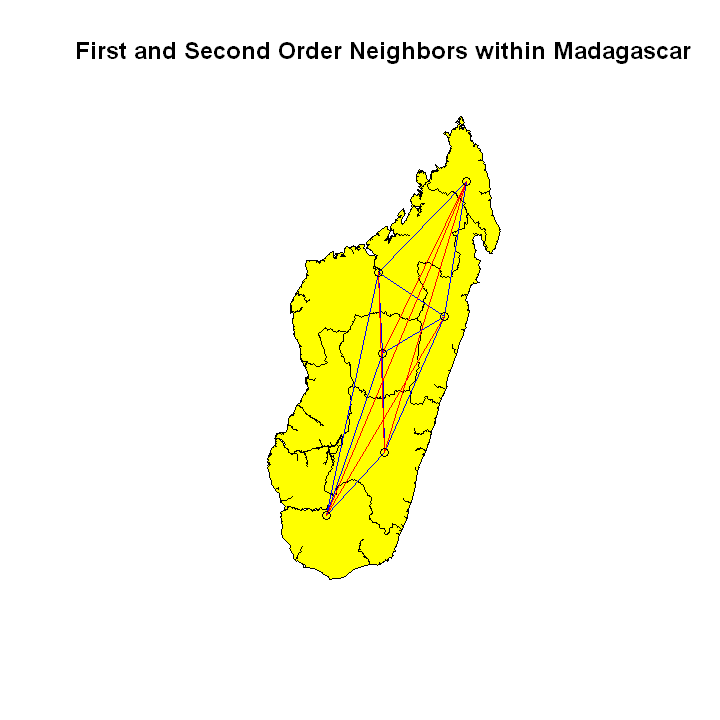

In [84]:
plot(subset1, col = "yellow", main = "First and Second Order Neighbors within Madagascar")
plot(firstNb, coordinates(subset1), add = TRUE, col = "blue")
plot(secondNb, coordinates(subset1), add = TRUE, col = "red")

Select and display the first and second order neighbor polygons for Toamasina, using different colors for each neighborhood and a different color for Toamasina. 

In [85]:
# reset row indices first

rownames(worldPoly@data) <- seq(length = nrow(worldPoly@data))

In [86]:
# grab the toa data only

toaData <- subset(worldPoly@data, (NAME == "Toamasina"))
toaData

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
345,687,Toamasina,Madagascar,MGA,MG,A,Province,Madagascar,Africa,Primary land,5,25.2649,6.058755,0


In [87]:
# give me the row index

toaRowNum <- as.integer(row.names(toaData))
toaRowNum

[1] 345

In [88]:
# confirming that the index is correct. Pulling out toa

toa <- worldPoly[toaRowNum, ]

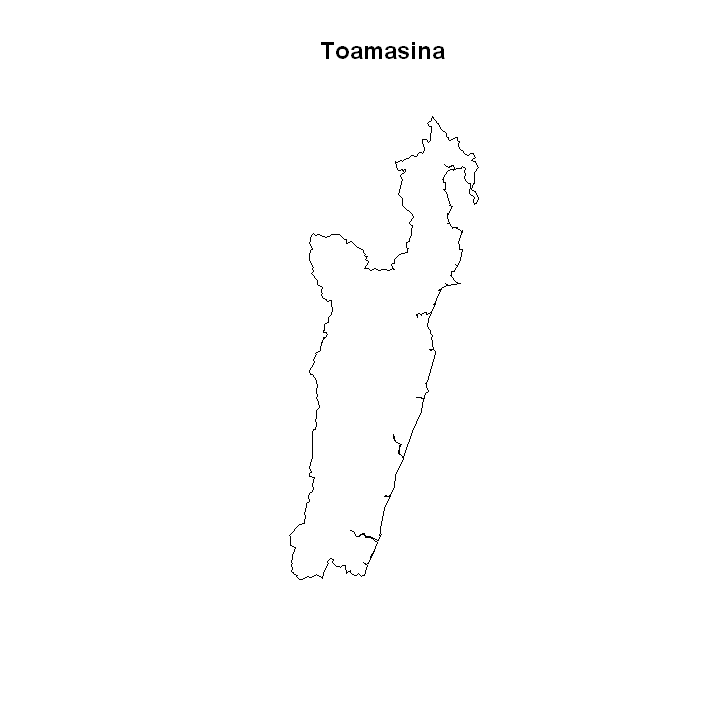

In [89]:
plot(toa, main = "Toamasina")

In [90]:
toa@data

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
345,687,Toamasina,Madagascar,MGA,MG,A,Province,Madagascar,Africa,Primary land,5,25.2649,6.058755,0


In [91]:
head(worldPoly.nb, 10)

[[1]]
[1]   3  59 143

[[2]]
[1]   80   98  117  146 3077 3083

[[3]]
[1] 1

[[4]]
[1] 0

[[5]]
[1]  35  79  83 126

[[6]]
[1]  20 104 132

[[7]]
[1]  22  39  86 107 127

[[8]]
[1]  24  25  28  66  90 101

[[9]]
[1]  28  39  86 124

[[10]]
[1] 64 69 76

In [92]:
# Get the 1st and 2nd order neighbors of Toa

maxlag <- 2
world.lag <- nblag(worldPoly.nb, maxlag)

In [93]:
firstWorldNb <- world.lag[[1]]
head(firstWorldNb)

[[1]]
[1]   3  59 143

[[2]]
[1]   80   98  117  146 3077 3083

[[3]]
[1] 1

[[4]]
[1] 0

[[5]]
[1]  35  79  83 126

[[6]]
[1]  20 104 132

In [94]:
secondWorldNb <- world.lag[[2]]
head(secondWorldNb)

[[1]]
[1] 18 51 60 97

[[2]]
 [1]   44   47   64   68   71   85  102  108  123  127  375  565  774  795  816
[16]  878  923 3078 3079 3085 3086

[[3]]
[1]  59 143

[[4]]
[1] 0

[[5]]
[1]  13  95 113 140

[[6]]
[1]   50   61   89  100  141 3081 3087

In [95]:
# list of 1st order neighbors indices of toa

firstToaNB <- firstWorldNb[toaRowNum]
firstToaNB <- unlist(firstToaNB)
firstToaNB

[1] 151 152 193 242

In [96]:
# list of 2nd order neighbors indices of toa

secondToaNB <- secondWorldNb[toaRowNum]
secondToaNB <- unlist(secondToaNB)
secondToaNB

[1] 346

In [97]:
firstNB <- worldPoly[firstToaNB,]
print("First Order Neighbors:")
firstNB@data$NAME

[1] "First Order Neighbors:"


[1] Antananarivo Antsiranana  Fianarantsoa Mahajanga   
2946 Levels: 18 Montagnes A'ana ÃmnÃ¶govi Ãrebro lÃ¤n ... Zuzemberk

In [98]:
secondNB <- worldPoly[secondToaNB,]
print("Second Order Neighbors:")
secondNB@data$NAME

[1] "Second Order Neighbors:"


[1] Toliara
2946 Levels: 18 Montagnes A'ana ÃmnÃ¶govi Ãrebro lÃ¤n ... Zuzemberk

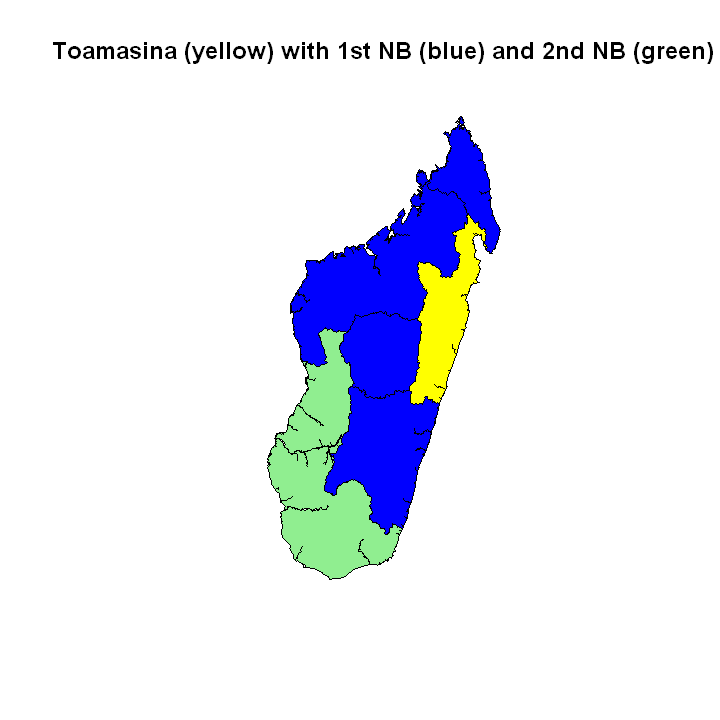

In [99]:
plot(subset1, col = "white", main = "Toamasina (yellow) with 1st NB (blue) and 2nd NB (green)")
plot(toa, add = TRUE, col = "yellow")
plot(firstNB, add = TRUE, col = "blue")
plot(secondNB, add = TRUE, col = "lightgreen")